# [Introduction to Data Science](http://datascience-intro.github.io/1MS041-2024/)    
## 1MS041, 2024 
&copy;2024 Raazesh Sainudiin, Benny Avelin. [Attribution 4.0 International     (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)

## Second notebook on Random variables

Lets take a look again at the spam dataset and look at our concepts there

In [1]:
from Utils import load_sms
sms_data = load_sms()
sms_data[:2]

[('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
  0),
 ('Ok lar... Joking wif u oni...', 0)]

Let X represents each SMS text (an entry in the list), and let $Y$ represent whether text is spam or not i.e. $Y \in \{0,1\}$. Thus $\mathbb{P}(Y = 1)$ is the probability that we get a spam. The goal is to estimate:
$$
    \mathbb{P}(Y = 1 | \text{"free" or "prize" is in } X) \enspace .
$$
That is, the probability that the SMS is spam given that "free" or "prize" occurs in the SMS. 
Hint: it is good to remove the upper/lower case of words so that we can also find "Free" and "Prize"; this can be done with `text.lower()` if `text` a string.

To do this we can create a new random variable $Z$ which is $1$ if "free" or "prize" appears in $X$.

In [3]:
interesting_words=set(['free','prize'])
TF10 = {True: 1, False: 0}

# read from right to left: split each line in sms_data, and covert the first word to lower case. Next, you want to find an intersection 
# with the set 'interesting_words', i.e. does the first word contain the word 'free' or 'prize'. So the output is a set of 0s and 1s
Z_obs = [TF10[not interesting_words.isdisjoint([word.lower() for word in line[0].split(' ')])] for line in sms_data]

In [4]:
Z_obs[:10]

[0, 0, 1, 0, 0, 0, 0, 0, 1, 1]

In [5]:
Y_obs = [y for x,y in sms_data]
Y_obs[:10]

[0, 0, 1, 0, 0, 1, 0, 0, 1, 1]

In [6]:
import numpy as np
def F_X_12(x):
    TF10 = {True: 1, False: 0}
    return np.mean([TF10[(y <= x[0]) and (z <= x[1])] for y,z in zip (Y_obs,Z_obs)])


# z can be at most 1 anyway, so what you are finding above is the marginal distribution of Y

In [10]:
F_X_12([1,0])

0.9551328068916008

This is the JDF for this problem

In [14]:
print("\tz <= 0 \t\tz <= 1")
for x1 in range(0,2):
    print("y <= %d \t" % x1,end='')
    for x2 in range(0,2):
        print("%.2f" % (F_X_12((x1,x2))),end='\t\t')
    print('\n')

	z <= 0 		z <= 1
y <= 0 	0.86		0.87		

y <= 1 	0.96		1.00		



In [ ]:
F_X_12((1,0))

In [15]:
F_X_12((0,0)) == F_X_12((0,1))*F_X_12((1,0))

False

In [16]:
F_X_12((0,1))*F_X_12((1,0))

0.8270846721557743

In [ ]:
# Are they indepdentent? If so, then the JDF is just the product of the 
# DFs for Y and Z, but
0.865936826992103*0.955132806891601

Which is not 0.858, so they are not independent. So lets try to estimate the probability that $Y=1$ given that $Z = 1$. Lets again do that by filtering

In [ ]:
np.mean([y for z,y in zip(Z_obs,Y_obs) if z == 1])

Compare that with the marginal probability of $Y = 1$, which is according to our JDF 1-0.866 = 0.134

In [ ]:
# Or we can just compute it directly
np.mean(Y_obs)

What we see from this is that knowing that the words "free" or "prize" appeared in the sms text, we are much more certain that it is a spam. We also see that looking directly at the JDF this can be hard to see, although it is equivalent.

In [17]:
x = np.random.normal(size=100)

In [18]:
np.mean(x)

-0.08265975892373005

In [19]:
g = lambda x: x**2

In [23]:
mean = np.mean(x)
y = x-mean
np.mean(y**4)

3.588674726116084

# Notes from 12/09/2024 Lecture

The steps below are usually what we do to explore data
- when you read a file, look at the data types (is it integer? need to convert to a string?)
- explore the distributions of the data
- calculate mean?
- relationships between different variables?

In [1]:
!ls data/ #'!' allows us to use bash commands

CORIS.csv	     earthquakes_small.csv  portland.csv
NYPowerBall.csv      final.csv		    pride_and_prejudice.txt
auto.csv	     final.csv.zip	    rainfallInChristchurch.csv
co2_mm_mlo.txt	     final.tgz		    ratings.csv
digits.csv	     flights.csv	    spam.csv
earthquakes.csv      indoor_train.csv	    visits_clean.csv
earthquakes.csv.zip  leukemia.csv
earthquakes.tgz      mammography.mat


In [2]:
# exploring the dataset. Best to look at the data file directly before you start to code
!head -n 5 data/CORIS.csv

row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
last column is chd = Coronary heart Disease = Y
all other columns are potential predictors of Y

1,160,12.00, 5.73,23.11,1,49,25.30, 97.20,52,1


In [10]:
import csv
with open('data/CORIS.csv', mode = 'r') as f: # standard way to open and read file
    reader = csv.reader(f)
    header = next(reader) # only reads first line

    #now we want to only read 3 lines
    for i in range(3):
        next(reader)
    data = [[float(x) for x in line] for line in reader] # every lines become a float

In [13]:
import numpy as np
data_array = np.array(data)

In [25]:
Z = data_array[:, [1,6]]

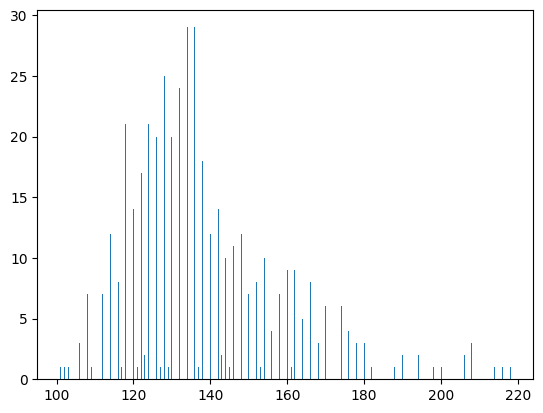

In [16]:
# construct marginals

X = Z[:,0]
from Utils import discrete_histogram
discrete_histogram(X)

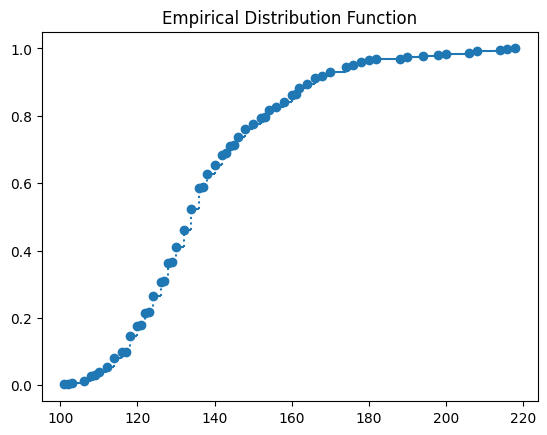

In [17]:
# We do for X
from Utils import makeEDF, plotEDF
f_X = makeEDF(X)
plotEDF(f_X)

#the EDF below converges faster than density

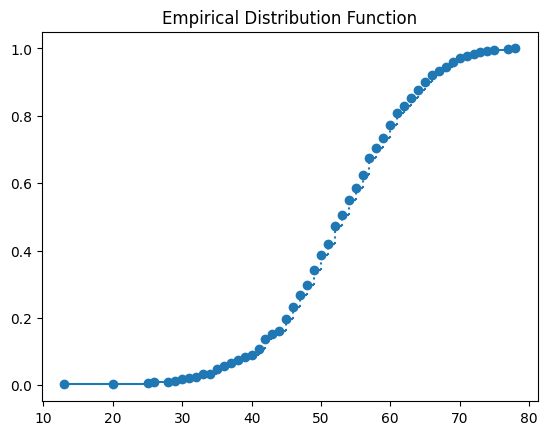

In [20]:
# We do for Y
from Utils import makeEDF, plotEDF
Y = Z[:,1]
f_Y = makeEDF(Y)
plotEDF(f_Y)

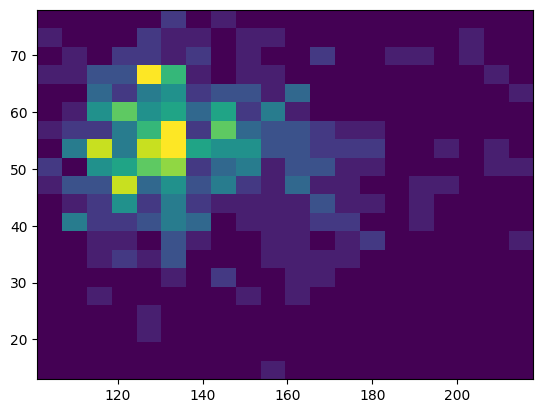

In [22]:
import matplotlib.pyplot as plt
_ = plt.hist2d(Z[:,0], Z[:,1], bins = 20)

# Conditional Distribution

In [26]:
X = Z[:,0]
Y = Z[:,1]

# what is the distribution of X given that Y = 55
X_given_Y_55 = X[Y == 55.0]

# probably better to use regression instead of checking what happens to x at every y

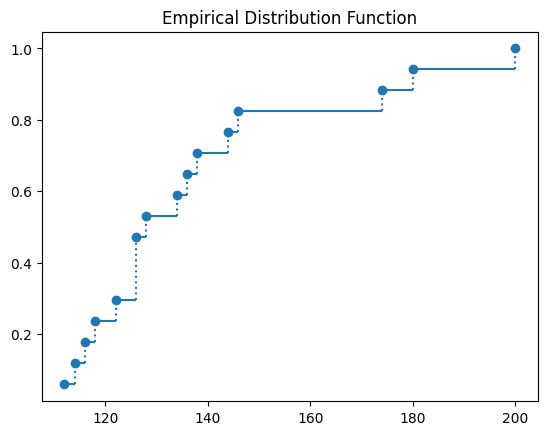

In [28]:
plotEDF(makeEDF(X_given_Y_55))

## A little introduction to Regression

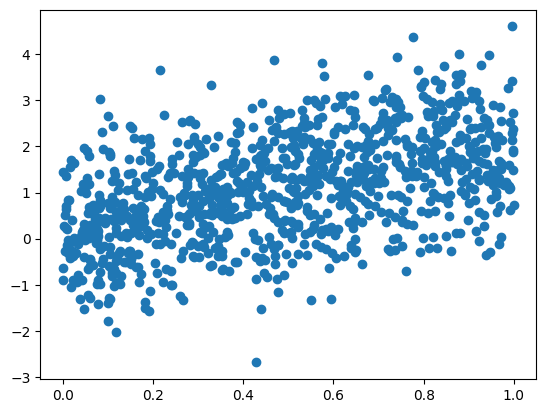

In [35]:
X = np.random.uniform(size=1000)
Y = 2*X + np.random.normal(size =1000) + 0.1
plt.scatter(X,Y)

# in regression, we want Expectation[Y | X = x] = r(x), where r is the regression function

## Moments etc

In [ ]:
import numpy as np
x = np.random.normal(size=100)

In [ ]:
x

## Sample mean

In [ ]:
np.mean(x)

## Sample variance

In [ ]:
np.var(x)

Or by doing it yourself

In [ ]:
mu = np.mean(x)
np.mean(np.power(x-mu,2))

Higher moments, we can use `scipy`

In [ ]:
from scipy.stats import skew, kurtosis

In [ ]:
skew(x)

In [ ]:
kurtosis(x,fisher=False)

## Moments and tail behavior

In [25]:
def standardize(data):
    mean = np.mean(data)
    std = np.sqrt(np.var(data))
    return (data-mean)/std

(-3.0, 5.0)

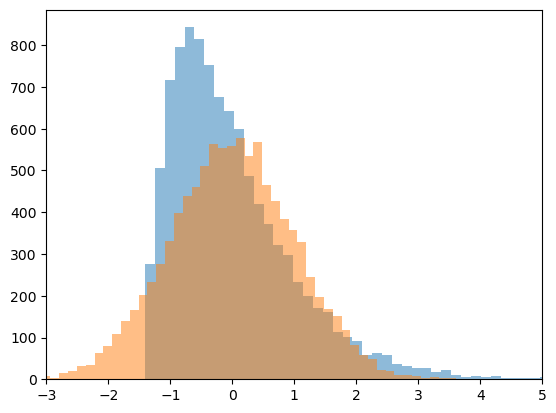

In [26]:
import numpy as np
chi2 = np.random.chisquare(4,size=10000)
normal = np.random.normal(size=10000)
import matplotlib.pyplot as plt
_=plt.hist(standardize(chi2),bins=50,alpha=0.5)
_=plt.hist(standardize(normal),bins=50,alpha=0.5)
plt.xlim(-3,5)

In [27]:
from scipy.stats import skew, kurtosis
def print_basic_stats(data):
    print("mean: %.2f\tstd: %.2f\tskew: %.2f\tkurtosis: %.2f" % (np.mean(data),np.std(data),skew(data),kurtosis(data,fisher=False)))

In [29]:
print_basic_stats(standardize(normal))

mean: -0.00	std: 1.00	skew: -0.01	kurtosis: 2.97


In [30]:
print_basic_stats(standardize(chi2))

mean: 0.00	std: 1.00	skew: 1.40	kurtosis: 5.86


In [ ]:
print_basic_stats(standardize(np.sqrt(chi2)))

In [ ]:
np.mean(np.power(standardize(chi2),3)) # Skewness

In [ ]:
np.mean(np.power(standardize(chi2),4)) # kurtosis

## Transformations of random variables

Consider a Binomial random variable

In [ ]:
n = 10
p = 0.5
x = np.random.binomial(n,p,size=1000)

Lets plot the empirical density

In [ ]:
from Utils import makeEMF,makeEDF,plotEDF,plotEMF
plotEMF(makeEMF(x))

If we had the function $g(x) = \sin(x/3)$

In [ ]:
plotEMF(makeEMF(np.sin(x)))

In [ ]:
plotEDF(makeEDF(np.sin(x)))

Can we compute this thing?
What is $\sin^{[-1]}$?

Since $X$ is discrete, we can check what $\mathbb{Y}$ is, since $\mathbb{X}=\{0,1,\ldots,10\}$.

In [ ]:
Y_space = np.sort(np.sin(np.arange(0,11)))
sin_inv = dict(zip(np.sin(np.arange(0,11)),np.arange(0,11)))

In [ ]:
from scipy.special import binom as binomial
plotEMF([(y,binomial(n,sin_inv[y])*(p**sin_inv[y])*((1-p)**(n-sin_inv[y]))) for y in Y_space])

In [ ]:
plotEDF(emfToEdf([(y,binomial(n,sin_inv[y])*(p**sin_inv[y])*((1-p)**(n-sin_inv[y]))) for y in Y_space]))